# 生成训练数据

用的是 MUGE 数据集.

In [4]:
import os
import json
import pandas as pd
from tqdm import tqdm

import io
import base64
from PIL import Image

In [2]:
input_dir = r"G:\code\github\Chinese-CLIP\datapath\datasets\MUGE"
output_dir = r"G:\code\github\Chinese-CLIP\datapath\datasets\MUGE_blip"
os.makedirs(output_dir, exist_ok=True)

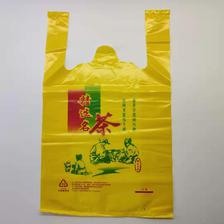

In [5]:
def decode_image(image_base64):
    image_bytes = base64.b64decode(image_base64)
    image = Image.open(io.BytesIO(image_bytes))
    return image

decode_image("/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADgAOADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0fFG2n4o21dwGbaXZTwKUCgBmyjZUmKRvlRm9ATSbsrlIZso2VknXGAH7lM/7xqRNYdyFEClvTfivKWdYN/a/Bm31ep2NLZRsqK3uWml8to1U4Jyr7ulW9hruo16daPPTd0Zyi4uzISnFJsqfbSbPatGySDYKTZU5T2pNtAEOyl2VLto20mBFso2VNtpNopARbaTbWdNqDpI6CRgVY5yg6Z7VE2pyldwkdCMgqUBz6c14087oRk42enp/mdCw02rmrs4pNgrFTUrggGSaYDPRIx+QrWsXea0SSTdubJ+Yc4zXRhMyp4qbhBNddSalGUFdjynNJsqYrSEV3sysQlKQpUpFJigRCVpMVMQKYRQBcxSgZpKcOlbEiYpwFApaYBilwCMEcUlObhSfapm7RY1uYc2lxmZjEPLA5O4ZBqnsgj+RsEnkEjP51fuCUJKzsQeqnpUKW9lKuGHlt6qa/PZpN2joeumWNLhCXDt5YQle3Q1r4qjp0CwllSXegHA9K0K+vyiPLhI/P8zz8Q71GMopxApCK9FmIlGKKKQCbaNvvRmjNMA2+9Jtpc0ZpAZM1nAGdp2OWYkbeuKo3EARg0SEp67hk/WtW5uTbhmIG0cZY8fl1NYLO91J8isxJ7LgCvg8TGKqSSWt3+bPVg20iWCCOVsNMoPop6VvWyeVbogJIXjJ+tZVvJDZL+8YPJ6LzitW2cS2ySAYDc16uRqKqy72/UwxXwokNJS0lfTHGhpFNxTjSUmJjSKawp5pjdaBFqlFJThWxIopw6UKMUtMBaium2Wkreimpaq6idthL74H61z4qXJQnLsn+TLgrySMETSdyCPQjNNYlmJJ/KmE5pV5r84cmz1jY0VcLMfcCtWszSVKwtkEHdWlX3uVx5cHTXl/meZWf7xi0lFGM13mVxCKSori9trXiWUBv7o5NRxanZzNtWbaf9oYrnliaEZcjmr9rl8kmr2LNFJuGetG7NbEi0YoooA57VG3XzhkQ7eASM1TaRyuN5x6DgVZ1iKT7e5WRlUgHhazvKlP/Lw3/fIr4HGK2Imr9X+Z6tP4ESYHrXQacc2EQ9Bj9a5vyJP+fl/yro9KXbp8YLFjzkn616WRaYiVn0/VGOK+BFo0U49abX1ZwjaSlxSGkxNiGmN1p5pjdaALQ608daYOtOrYkeDilptKOlMB1VdRjea0KRqGYsOCcVaqOfBiORXJj0nhpp9jSl8aOfl0+5jTe8kaj/ZUsRVdrYYG+7lb/ZVcf1rYdpYQZZSAh/gzkmsuRvMkLBcAngelfB1bQ0ieombulRJFYRhc85PJyetXKq2Xy2sa+i1ZzX3+Gjy0YR7JfkeTN3k2FNdxGjOeigmjeuCdw496p31wrQbEUur9SvSssVi6dClKd1e2i8xwg5Oxz8kVxPIzkqzMcnmozbTdSAAOpJ/wrUjkskx5iNvA5B5p/wBuZmIt4wAP75H8q+D396T1Z6XkiXR3keAxSnJT7p9q1MVjW1zM9yrkDaOCQvFaaXMbnGHB/wBpSK+qyrH05UFCpKzWmvVdDjrU2pXSJqKYs0bOUDDeOop9exGcZq8XdGDVjD1ZXa9woDDYDt3c/lVRGtcYdZVf0zVvWwBdoe4T+tVoLs8JJhl7Fhmvh8wSWLqJ9/8AI9Oi/wB2hoW3f7qSj6sP8K2rJVS3CpnaOmTUCCCYY27T7dKswRiKEKOQCa9HJIWrt+X6oyxL90lPWm0p5pK+oOISmmnU00mIQ0xutPNMbrQBapQabQK2JJAaUGmClB4pgSZqG6kEcW4nC9zUmay9Zk4iXOBgk152a1PZ4ScvT8zWgr1EUrm4a4k3HhB0H9azbi75KRH6tTLi5L/InA9fWmRQFj0618Lu+aR6djo7DVrb7MiysVkAwV2k5+lWJZDeDarMig/dHU/U/wBKzbKx8tRI6ZJ6c1ZmPkkqrc4ycelenVzHEVKSpzfu+WjfqYeygpXRoQRRpGEQ8Dv71FPaKzEqCCeoDYBqrb3L7Tgbj2pwvfKznDN3xz+Arm9pTcUmtB2Y/wCxyMu1whX0LZ/pRPah1ybdDgdjig3yuoZQQe4NH2sk8sPpR+6tZBqRpaMB5kDBQegPOKuxK4j/AHhyx/u1WjcKWb7qnnB45p32wgH5c4/KiDhANWWGTIGOo6EnmiS48iEu4L4/u96i+0jy8sQCR0pBMpUEng/lXXRxc6N/ZytcmUFLcwb7UGurnzCuwDhQew96gDB+V69xWhqFgjtviwCe2ax3V4WwcgjvXnVXKc3KerZ0RslZGrZXexgkp+U9D6VvIAE46ZrkI5Vl4YhX9ex/wro9MdmslV87lJHNevkcrV3F9v8AI58SvduXaSkpM19UcIGkPSkLUhPFJgGfWmE5NBamk80gLVA60maM10JMkfmjIpmaXNAD81ha75r3CqoJXYK29wrG1a5jS52lGLBRyDxXj54/9k+a/U6MN/EMqK1cnJAH+8cVcSIxnJaI47ZOPx4qv9tX/nmf++qct9GOsJP/AAKvjLNnoFiR7mQ83APsCQKERwP9auT161zuveIWsGgEce0Pk9c+lY//AAmc+eEWu2ll1atBTTVn6m0cPOcbo7uWf7NFgzABuOhqsl7BvAaQBe5BrkoddvdQkVDbgrguGbIXj3qCfV5IZWjkgVXHUYP+NV9Q5Xyyd2eZi6s8PNxaO/t5raeVlScgAZ5Wp/kBytxz67TXG+H9VaeaYCNQVUHp71v/AGxj/Cv4CuOtTdObikaUKntIKRolUJz9oBz1yDmlO1RgTbl7gA1nfbDjmNact8ijmNs+xrLXsbGjhioAYlmOBkYIHv3qC7heNgpdMAcAkj+VU/t8ef8AVsT6huaY9+o6xsf+BU9bbDW5ejfavLj/AL6J/pSSGGUbZNh/2gCDWcuoxhvmiYj03YofUUJ+SAj6vn+lVyzKFmslyTDMp9mBFbGipIlmVkzkMQOe1YX24/8APIf99Vt6NN5tq527QGx1r1sm5vrSv2ZhifgNSkLYpuaQmvrjgFJppPFNLUmaTADSUE4pu6kBazRmm5NGTXWiR4NKDUY5pahgSVz2tgG/Hug/rW7msLVzm/Hsgrx89/3T5r9Towv8QzxEO9SLCh6uB9QaQGl5NfG3PROY8ZQ2wNkGugPv9EPtXP2dhBcXSRrdoF65cYDY7fU1s+N8eZZAkD5X/mK5WFTLKkajLMQo+pr6rAK+Ej8/zZ6VC/slqdU6lY74JcxxxsnlAKCAAD6AdBnH59ap6kbcyQoJYoykKDKKx3jAwT79qelvceWTf3DeWF2ReSVZpDuA6HlsfnWTcgw3UkTTMwQ7dwXBIHt2rOEYuX9eh4OdTapqFt3vp2+86jweU+2XQ+8ojXkrg9a68LaH70jqfZM1xXgpoWu7va0pPlr97p1rsfl9hXhZhZYl/L8jPAfwF8xxhtzn9+uP905qAeQt75TOxj25+Vec1Jgev6VRMUY1lW2uXMRO/Py46Yx61z02ne/Y6p3VrdyzeT20CxeXC5LSBWJI6VZc6ZjkS59cVn6hGhEO5GYCUEAHvVmRgBwB+VU2uVO3cI35mDNZA/Lz9QaiJgYn50X/AICaQn/ZB/ChduclBUGoeTA3S4jH1BFbekRiK0YBgQXJBArGN4sX3IY93qRnFamjSPLbSvIxZjJ1P0Fevk3+8r0ZhiPgNMmmFuaCabmvrTgFzzSE+9Nz700miwDiabSFhTS1SBdopM0ma6iR2aM+9NzRmpEx9YOrMft7eyit2uf1Q51B89gB+leJnz/2ZLzX6nThfjKwbNPFRgA08AAcV8gz0Uch42G6ey/3H/mK5iF2hmjkUlWVgQQOldb4uiMlxakDICN/OuaNu/ZK+oy+UfqsU/61Z6uHt7JGxPfW1xHsEYlEZOGwSVTOQuTjbzxwaiuza3zxyRxNHcswDqAAj+hAycHp3pbVby3lht7WfyAyh3ZwNnI5MmenTAH45qW7sVtnlmuSscanLFOnPIC+ue1YSlGMko/I8LNITk404q6b001Xz8ybTtfjsL66E1ujyD5AYlCADPQnpj3q/D/amsXcepW8ws4gNio3zZXucdDXHqLN1mupSkS8iG2ByXP+1jtz1710OhR6zcWzvaSyWqKBtSbLRv8ATPIoxNGEE6kUk9m3senKnCEbxSR2yqcDufXGKpMGGsf65dvlf6vf39fSufTUPFLXPktp8RIPLnIX881uiNjextKI93lnp1B9vwrxnh3Ru5NO6ezucFam1YNUYiOH/SEi+cH7+M+3FW2STHAU59GFU75Cyx/u0fDdH/p71M7EDisn8EfmTH42S+XL3T9aYY5T0UD6sBVdpT61GZGPTNJRZqWDayHq0Y+ritfSFMUEiEqTuz8pz2rnj5rdFP5Vs6GriGbeMHcP5V6uU3WKXo/yMcR/DZrk0wnnrSmm5Ga+tPPCmmkNNoAU0lISKQkUmgNCkpM0Zrdki0uabmk3UASZrB1FQ19IcjqBz9K3M1z1/wDaGvpQsLsN3BC5rws/v7CKXf8AQ6cKveY1YC3Rl/76FTLYyN/Eg+riqghuyeLeT/vmneRdDrC4/Cvk+Xud4l94eN6ULTxfKCPvVBF4aRJAwkiOOnz1ZEF2ekTfpUnk3I4MePxFbRryjHlWxSqyStcpv4Rt5XdmuEjLrtcqVYt15ywJzz1FZ58Ky3+oeXeTwQ6dbHEMSH7w7VuGGcdQB/wIUwwv3bmrhjakf629BKrNdTnNS0CaG0uPMmt5IRkJ5ajeR2zx0HtW1FpmWsby2vVjfaouIiTtZcenqKrXlw8EjgI0y7MqI0LfNnpxx+vaq2j6x9tnkhmXyZR9yN+GPUEc9SMdvWumdatOlzWWn6rsZvFptQb1OqMMOP8AXKfTFVjZacLwXbO7TBdoGeMVXwfQ1laxfCw+zqZRGZWI3MM9B0/HNefRjKUuWHUipyxjzS6GzdxWN2saywZ2Nu+8cE1K1zbr/wAu0bfWub8O3k+pw3L3LBWWXCrwCox0I9q13tgR981VSMqcvZyewUpRmuePUtHUIl+7aQj/AIDmo21J+0cS/wC6gqobYZ/1hphtwP46Wnc1J3vpG6nH0FX9GlL+fk55FY5iI6PWpovyeeM56f1r0sqSWKjbz/IyxH8NmwTxTc0jNTc19ceeKTTSeKQnFMLUAKTmkJppNJmgDQzRmm0lbEkgNLUeaXdQA/Nc5fXEq3sqrIwAY8A10O6uavTm+m/3zXg59/Ch6/odWF+JkfnzHrK/50eZIf42/Om5HtT19q+XZ3Au5jy7fnU4T/aNRgc5J4rE8Sazd6ULdrZUKSbgSy5weMU6dOVWahHcyq1FTjzS2Og2kd6z9RYmJy0pSKMHOGxubHA+g6n8Kdot1PeaTBPc481gc4GM88GsXxFAHje4m3sFlMarGhfnAxwWGD9M5rbD0f33JLoY1av7rmXU3bu28/Thhtm1NwwcbeP0/wDrVVtNWsDBsGGlt48yLHGW2+pB9OKyf7ZeNLqLVJYXbaqtAW4A5yAFyT7+hGKwIdQtZ9Wmf7PmOXO1e+PTH0rrpYOUouM+mqsc08Sk04/idpH4o02SHzA04XOBmE81FqUtvqPlp5hgkiKTQTEjkk449sGskMZmjs5SWtbc7GDsU2MSSCw78DPpzVS+1mylnDW9ttjjP72bH316dR36Ee9OGEippwT/AD/r/ghKvJxtNo6RILPeJEiktpoc4kbhm7ZPPzc+tXwxkj4wSDhsetczdavNJNawR20J+04aEyFgQo7vx6jOB6c1tadN51sd8okmbDu4jKBx0DAHscda569GSgpS/wAzqoyTbUUWGBH8BqM7D14+tSFuetI746gH61zI6SMoh6GtTRFCmf8A4D/WsotGeq/lWpou0PMATyB1/GvRyz/eo/P8jKv/AA2a5pD1oNRsea+uPPAk000U1qQASQaaTSGmk4oA0d1Aam5pM1sSSZFLkVGCaXJoAfkVzd2c3cx/6aGuiHNc7dY8+X3c/wA68HPn+7gvN/kdWE+JkIwOKdu4wOKbgk8U4I1fMHcYMWrSNfATSvvWURGCOIkfXd2B6+9LHr0F4r3T258mB0XbIASGY43D8KttpVzHdPcw3G7Bd44TwpYjjJzzg1grpGqvcBL+2d4pHLymMA5OAByK9OCw89dFp6evY86q6sbL+vI6+KaCOZI43QeYpYKD6dwPxqtfWEkkrXFtIEnODuI5GB2rIgJtGX7LpDwMsmCXzlwB2471vJdbYTJcAQJjILsB+HNck4SpSUofoaxcaitL9TGTwpaSfPeSu8pOSQAAaLfwrpVrdpKZ2kVTny5Npz9T6c0uoXdvcK/2a2vLiQjhowyrn6nisSPR9fn5Eez/AH5AK6oOtKLc6nL9xzyVOLtCnc62S30/y5It/wAsihW/enOB05zWemjWkc5lgulzuD7JgHUt6nvmotL0W8gz9vhinOeGFwePwxit6O0hjHyQxr9FFc0qjpO0Z3OmEfaK8o2MefS5DcNqF3em4CRMgQIAFB4ypzwamiWOC/8ALjUKWMuQM4IBX1//AFVqS26ywPE33XUqcccGqENhJFcvNJJuJBCgZ7nJJyevA/KiNfng1N+h004xgml1J6axzwad5ZzTShHpWKGMJQfxCtHRWBmlwcgKP51nFW7kfhWjo3yzTA91H8678u/3mH9dGZVv4bNlm44phNBNMZua+uPPBmppPFJmkJoACaaSKQmmk0AaWaM0mRRkVqSKDS02lyaAHg1y1zKTcyZ/vH+ddOO1crNzcP8A7x/nXgZ78MPV/odeE3YglwelV7rUDDsjQp50h+XecBR3J9u31IqfaPSs6/S3E/mMZg4UKwVcggfN/dP6V4NKEZTszujuaFlqC3NuJMFXHDrnO0/5/SpDqMXAy5yM8LWfpkcCM6qZWkYfNvHZeBjgDvUbW5ZwoiUYXBH+Vq3RpubXQbSuaZvogRkSnPPEZp/2m1kHmFWOzpujORn0rHbzSoA44ZS2PvA+vy1aS1jEKbrjG3sYxhT37USoQiDjHqXDeQMSNz4H+wf8KminidflYke4IrLWzhd8+YrqOqhanW1gVw4iUMDkGspwprRXE1E0fNT1o85c9RVXFG2seVElkzJ60xrhFHaoGCqpZyFUDJJ6CqE1/Z7MpdW7n0WZf8auFJyeiBLsaBvEz2ppu4z3FZiXdqxfdPCm1sDMq/MPUc1YXYyhl2spGQRyDWjo8u6KasWTcoR1FW9LmVrpgP7v9ay8L/dFXdJwt2eP4f6114BJYmFu5jW+BnQE1GTmnE5qMk19cecFNzQWphJoACeaTNFNJzQBpUU2jNagPBxTutR5pQ2KAJB2rlZG/fP/ALx/nXUhs1zE0ZLtgdzXz+etWpr1/Q6sLuxiuM9RUynjrVR7c5zjFC74/pXz7jfY7C5uApobMlQiVCOTTx1zmo5bCZZAIHWkPIqPLkk9aTcelTYBspwRREoYZJNMfk5NSxD5c5q3sA/CiimsR60buKjUQrAMpVgCDwQehqlLp9iF4srb/v0v+FWWkCjrVaa4BUkdq0g5rZ2Gm0Um0yyzk2dv/wB+h/hVuOMBAqIFQDAAHAFQxq0rbmyB6VZPmHhEbH0racpPSTKu2IQAKn05sXf4VWMExPK4qbT1KXvzEfdrowP+8Q9TKt/DZ0BPFRlqC3FMJ5r6480M0hbikJppYYoAGamlqQtmmkgUAa2aKbmjNagOpc00HNGaAB3KqSM1kSXxRyrWu4eoH/1q16YRmuTFYOjibe0V7epcKkobGP8A2hb8+bayL7rzSfatNkXLF19iDWztBoMMZ6qD+FebPJMO37ra+ZssTIxNmnS423GPY8U9bSA8RXP5kGtU2sJ+9Eh/4CKT7FbHrDH/AN8isZZGvs1H9yK+s+RnixPeZacLIhj+8UZq79gtf+eCflR/Z9rn/UJ+VR/YUv5/wD6yuxmvZyE/KN30IpGtp1QDY4A77a0/sFr/AM8Vo+xW/wDzz/U0f2HP+dfcP6yuxjGJh1f8xUT7xxvz9BW2dNtScmL9T/jTRptmD/qFP15oWS1F9tfcH1ldjDEGcB3bn2qb7PFtALHA6ZHWtZtOtDz5C/gTULaXCDlGlQ/7MhpSyar0mvxD6xHsUoo4okAT+EYXNEsswON/4CrD2Ep+7f3Y+rg/zFQf2fdLnbqVyO/8P+FZPJq97tplLExKkiXMnHzc+xqaxsJrecTSn5SCKebK9xj+1Ln8l/wp8FpPG2ZbyWUejgV04bLq9KrGTtZE1K8ZRaNDPvTS3NRjigmveOMcWppPFNJppbjrzQAFqaWprGmlh60Af//Z")

In [8]:
def save_data(split: str):
    """
    将数据转换成 datasets 库的格式
    TODO: 这个数据集要怎么生成的, 这个是图文检索的数据集
    """
    texts_file = os.path.join(input_dir, f"{split}_texts.jsonl")
    images_file = os.path.join(input_dir, f"{split}_imgs.tsv")

    split_dir = os.path.join(output_dir, split)
    os.makedirs(split_dir, exist_ok=True)

    meta_list = []
    image2text = {}
    with open(texts_file, "r", encoding="utf-8") as f:
        for line in f:
            line = json.loads(line)
            text = line["text"]
            for image_id in line["image_ids"]:
                image2text[image_id] = text
    # 读取图片
    with open(images_file, "r", encoding="utf-8") as f:
        for line in tqdm(f):
            image_id, image_base64 = line.strip().split("\t")
            image_id = int(image_id)
            image = decode_image(image_base64)
            image_path = os.path.join(split_dir, f"{image_id}.jpg")
            image.save(image_path)
            meta_list.append({"file_name": os.path.basename(image_path), "image_id": image_id, "text": image2text[image_id]})
    # 写入 meta 文件
    meta_file = os.path.join(split_dir, "metadata.jsonl")
    with open(meta_file, "w", encoding="utf-8") as f:
        for meta in meta_list:
            f.write(json.dumps(meta, ensure_ascii=False) + "\n")

In [9]:
save_data("train")

129380it [02:25, 888.64it/s]


In [10]:
save_data("valid")

5354it [00:06, 829.91it/s]